# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [34]:
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def points_gen(nDA,nR,nCN,nMU):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # nMU - number of multiples (hyperbolic, label 'M')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    for n in range(nDA):
        direct.append([random.uniform(0,.1),random.uniform(.5,1.5),0,'D'])
    
    reflected = []
    for n in range(nR):
        reflected.append([random.uniform(0,3),random.uniform(1.5,5),1,'R'])
        
    noise = []
    for n in range(nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        
    multiples = []
    for n in range(nMU):
        noise.append([random.uniform(random.uniform(2,2),4),random.uniform(1.5,2.5),1,'M'])

    events = direct + reflected + noise + multiples
    return events

In [35]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            ax.plot(x,[i[0] + offset/i[1] for offset in x],'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
        if i[3] == 'M':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'k')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

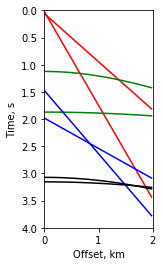

In [49]:
events=points_gen(2,2,3,2)
ax = points_plot(events)
plt.show(ax)

In [50]:
# Convert data in list format to dictionary

def makeEventsDict(events):
    eventsDict = {}
    labelsDict = {}
    
    labelsDict['label'] = []
    eventsDict['direct'], eventsDict['reflected'], eventsDict['coherentnoise'], eventsDict['multiples'] = [],[],[],[]
    eventsDict['events'] = []
    for each in events:
#         print(each)
#         print(each[0])
#         print(each[3])
#         eventsDict['direct'].append(each[0])
#         eventsDict['reflected'].append(each[1])
#         eventsDict['coherentnoise'].append(each[2])
         eventsDict['events'].append(each[0:3])
         labelsDict['label'].append(each[3])
    return(eventsDict,labelsDict)

In [52]:
from sklearn import svm
SVC = svm.SVC()

# This function takes a events list, turns it into two dictionaries combined, splits that into two arrays for X and Y
# trains a SVM label on them and then returns that model output details
# The model will need to be run on a input for a prediction

def comboFunctionA(events):
    testEvents = makeEventsDict(events)
    eventsDict = testEvents[0]
    labelsDict = testEvents[1]
    X = eventsDict['events']
#     print("X = ",X)
    y = labelsDict['label']
#     print("y = ",y)
    clf = svm.SVC()
    output = clf.fit(X, y)
    return(output)

In [60]:
# training on a test set
events_train=points_gen(200,200,200,200)

tempAnswer = comboFunctionA(events_train)
tempAnswer

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
tempAnswer.predict([[.1,1.5,0]])

array(['D'], 
      dtype='<U1')